## Example: Reading 2D tabular data (DataFrame) 

This example illustrates the how to read 2D tabular data using the HydroMT [DataCatalog](../_generated/hydromt.data_catalog.DataCatalog.rst) with the `csv` and `excel` and `fwf` drivers.

In [ ]:
# import hydromt and setup logging
import hydromt
from hydromt.log import setuplog

logger = setuplog("read point location data", log_level=10)

In [3]:
# Download artifacts for the Piave basin to `~/.hydromt_data/`.
data_catalog = hydromt.DataCatalog(logger=logger)
data_catalog.from_predefined_catalogs('artifact_data')

2022-09-07 15:37:52,510 - read point location data - data_catalog - INFO - Reading data catalog artifact_data v0.0.6 from archive
2022-09-07 15:37:52,515 - read point location data - data_catalog - INFO - Parsing data catalog from C:\Users\marth\.hydromt_data\artifact_data\v0.0.6\data_catalog.yml


ValueError: csv_to_dataframe: Data type DataFrame unknown

## CSV driver 

To read 2D tabular data from a comma-separated file (ano) and parse it into a [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) we use the [read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) 

For demonstration we use a dummy example data. 

In [5]:
# inspect data source entry in data catalog yaml file
data_catalog["csv_to_dataframe"]

crs: 4326
data_type: GeoDataset
driver: netcdf
meta:
  category: ocean
  paper_doi: 10.24381/cds.8c59054f
  paper_ref: Copernicus Climate Change Service 2019
  source_license: https://cds.climate.copernicus.eu/cdsapp/#!/terms/licence-to-use-copernicus-products
  source_url: https://cds.climate.copernicus.eu/cdsapp#!/dataset/10.24381/cds.8c59054f?tab=overview
  source_version: GTSM v3.0
path: C:\Users\marth\.hydromt_data\artifact_data\v0.0.6\gtsmv3_eu_era5.nc

We can load any 2D tabular data using [DataCatalog.get_dataframe()](../_generated/hydromt.data_adapter.DataCatalog.get_dataframe.rst). Note that if we don't provide any arguments it returns the full dataframe. 

In [12]:
ds = data_catalog.get_dataframe("csv_to_dataframe")
ds

2022-09-07 10:45:16,698 - read point location data - data_catalog - INFO - DataCatalog: Getting gtsmv3_eu_era5 GeoDataset netcdf data from C:\Users\marth\.hydromt_data\artifact_data\v0.0.6\gtsmv3_eu_era5.nc
2022-09-07 10:45:16,700 - read point location data - geodataset - INFO - GeoDataset: Read netcdf data.


<xarray.Dataset>
Dimensions:      (stations: 19, time: 2016)
Coordinates:
    lon          (stations) float64 dask.array<chunksize=(19,), meta=np.ndarray>
  * time         (time) datetime64[ns] 2010-02-01 ... 2010-02-14T23:50:00
    lat          (stations) float64 dask.array<chunksize=(19,), meta=np.ndarray>
    spatial_ref  int32 ...
  * stations     (stations) int32 13670 2798 2799 13775 ... 2792 2791 2790 2789
Data variables:
    waterlevel   (time, stations) float64 dask.array<chunksize=(2016, 19), meta=np.ndarray>
Attributes:
    category:        ocean
    paper_doi:       10.24381/cds.8c59054f
    paper_ref:       Copernicus Climate Change Service 2019
    source_license:  https://cds.climate.copernicus.eu/cdsapp/#!/terms/licenc...
    source_url:      https://cds.climate.copernicus.eu/cdsapp#!/dataset/10.24...
    source_version:  GTSM v3.0

The data can be visualized with the [.plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) pandas method. 

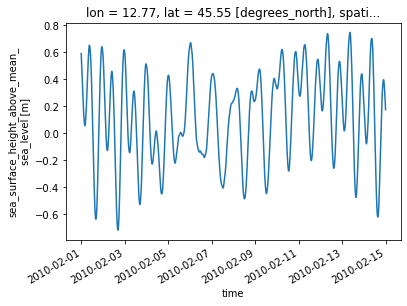

In [8]:
ds.plot(x=col2, y=col1)

## Excel driver

To read tabular data from excel files and parse it into a [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) object we use the [read_excel()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html#pandas.read_excel) method. Combined point locations (e.g. CSV or GeoJSON) data as well as text delimited time series (e.g. CSV) data are supported as file formats. Both fromats must contain an index and a crs has to me indicated in the .yml file. 

### Combined point locations

In [31]:
# Note that this is only example data 
data_catalog["wl_locs"]

crs: 4326
data_type: GeoDataset
driver: vector
meta:
  notes: example data
path: C:\Users\marth\.hydromt_data\artifact_data\v0.0.6\wl_loc1.csv

In [32]:
ds = data_catalog.get_geodataset("wl_locs")
ds

2022-09-07 14:00:47,167 - read point location data - data_catalog - INFO - DataCatalog: Getting wl_loc1 GeoDataset vector data from C:\Users\marth\.hydromt_data\artifact_data\v0.0.6\wl_loc1.csv
2022-09-07 14:00:47,168 - read point location data - geodataset - INFO - GeoDataset: Read vector data.


<xarray.Dataset>
Dimensions:      (index: 5)
Coordinates:
  * index        (index) int64 0 1 2 3 4
    x            (index) float64 12.1 12.3 12.5 12.2 12.6
    y            (index) float64 40.3 40.0 40.5 40.1 40.6
    waterlevel   (index) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    spatial_ref  int32 0
Data variables:
    *empty*
Attributes:
    notes:    example data

### Text delimited time series 

In [34]:
# Note that this is only example data 
data_catalog["wl_loc1"]

data_type: GeoDataset
driver: vector
meta:
  notes: example data
path: C:\Users\marth\.hydromt_data\artifact_data\v0.0.6\wl_loc1.csv

In [37]:
ds = data_catalog.get_geodataset("wl_loc1")
ds

2022-09-07 14:08:29,983 - read point location data - data_catalog - INFO - DataCatalog: Getting wl_loc1 GeoDataset vector data from C:\Users\marth\.hydromt_data\artifact_data\v0.0.6\wl_loc1.csv
2022-09-07 14:08:29,986 - read point location data - geodataset - INFO - GeoDataset: Read vector data.


<xarray.Dataset>
Dimensions:      (index: 5)
Coordinates:
  * index        (index) int64 0 1 2 3 4
    x            (index) float64 12.1 12.3 12.5 12.2 12.6
    y            (index) float64 40.3 40.0 40.5 40.1 40.6
    waterlevel   (index) float64 dask.array<chunksize=(5,), meta=np.ndarray>
    spatial_ref  int32 0
Data variables:
    *empty*
Attributes:
    notes:    example data